In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [5]:
# loding the data
df=pd.read_csv(r"C:\Users\ashu\Downloads\day.csv")

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [9]:
df.shape

(730, 16)

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# get the info columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
# check for the null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# renaming few columns for better understanding
df.rename(columns={'yr':'year',
                  'mnth':'month',
                  'hum':'humidity'}, inplace = True)

In [14]:
# check the data after renaming 
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# copy the datafram into new
df_copy = df.copy()

In [16]:
# check the shape of new dataframe
df_copy.shape

(730, 16)

In [17]:
# dropping the duplicates
df_copy.drop_duplicates(inplace=True)

In [18]:
# re-verify the shape of new dataframe
df_copy.shape

(730, 16)

After dropping the duplicates the shape is same as previous data,that means there are no duplicates in original dataframe as well.

In [19]:
# dropping the unwanted columns.
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [20]:
# mapping the season column
df.season = df.season.map({1:'spring',
                          2:'summer',
                          3:'fall',
                          4:'winter'})

In [21]:
# mapping the month column
df.month=df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',
                      7:'july',8:'aug',9:"sept",10:'oct',11:'nov',12:'dec'})

In [22]:
# mapping the weekend column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [23]:
# mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [24]:
# after mapping to check the head of dataset.
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
df.tail()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
725,spring,1,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796
729,spring,1,dec,0,mon,1,Misty,8.849153,11.17435,57.7500,10.374682,2729


In [26]:
df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

In [27]:
df.shape

(730, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [30]:
df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# step 2 EDA

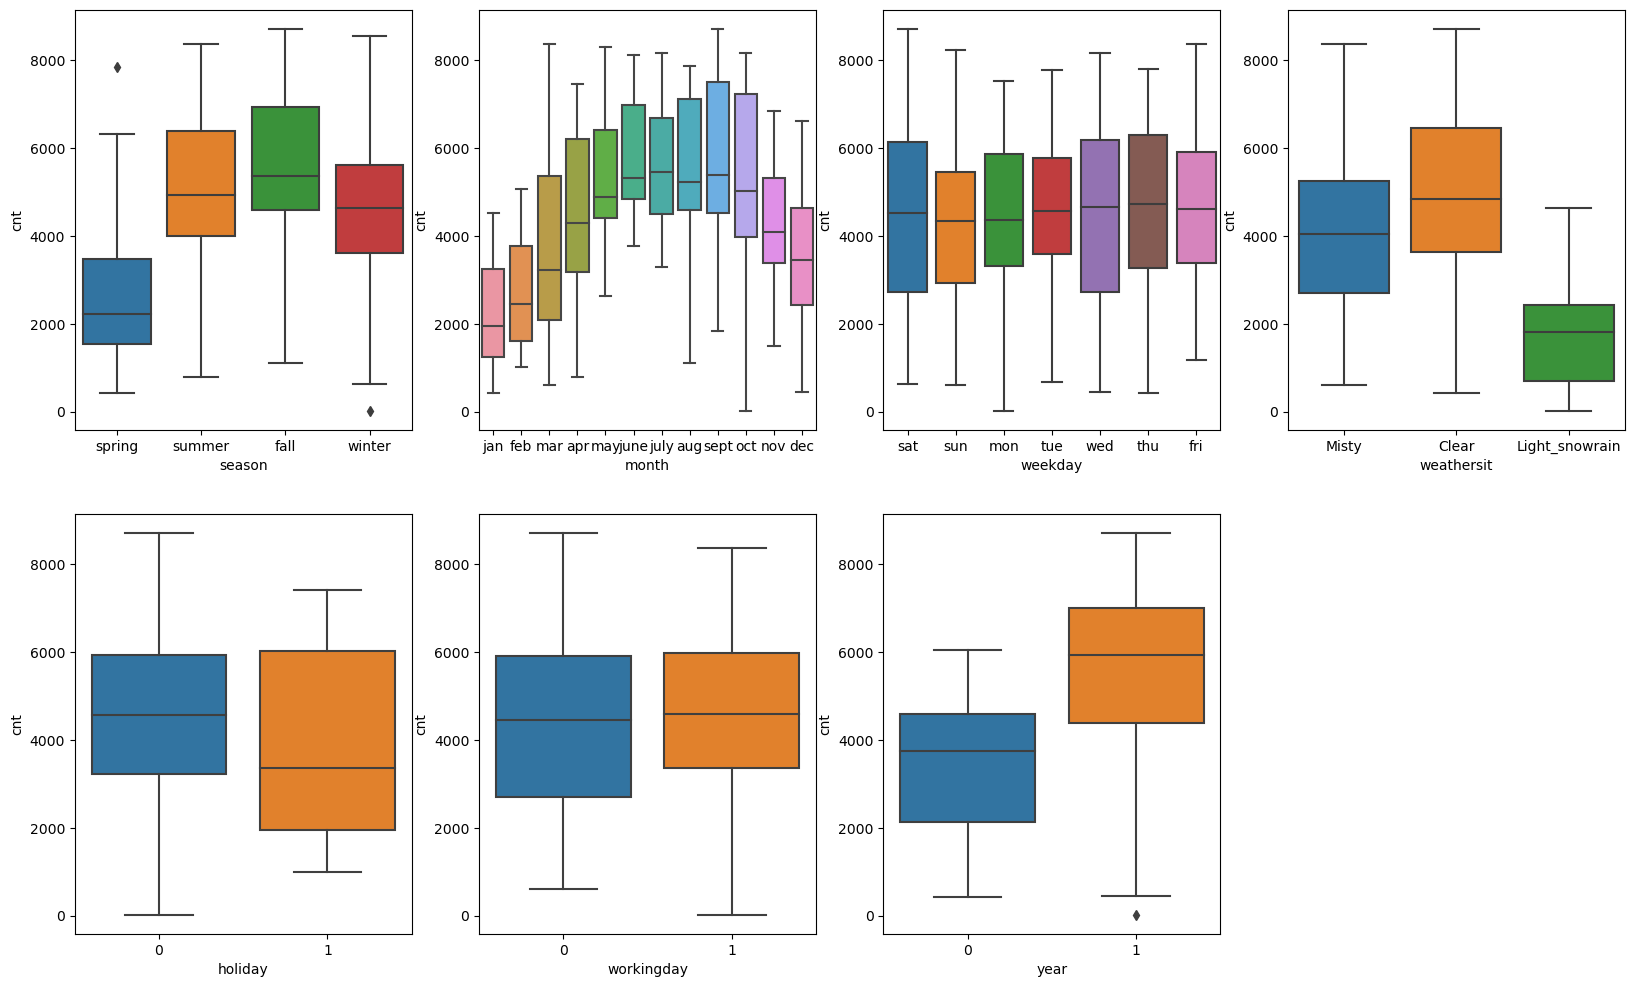

In [32]:
# analysis/ visualizing the categorial columns
#  to see the how predictor variable stands against the target variable 

plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='month',y='cnt', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='weekday',y='cnt', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit',y='cnt', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='holiday',y='cnt', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='year',y='cnt', data=df)
plt.show()


In [33]:
# create a barplot related to categorical columns
def plot_cat_columns(column):
    plt.figure(figsize =(12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df,hue='year',palette='Set1')
    plt.legend(labels=['2018','2019'])
    plt.show()

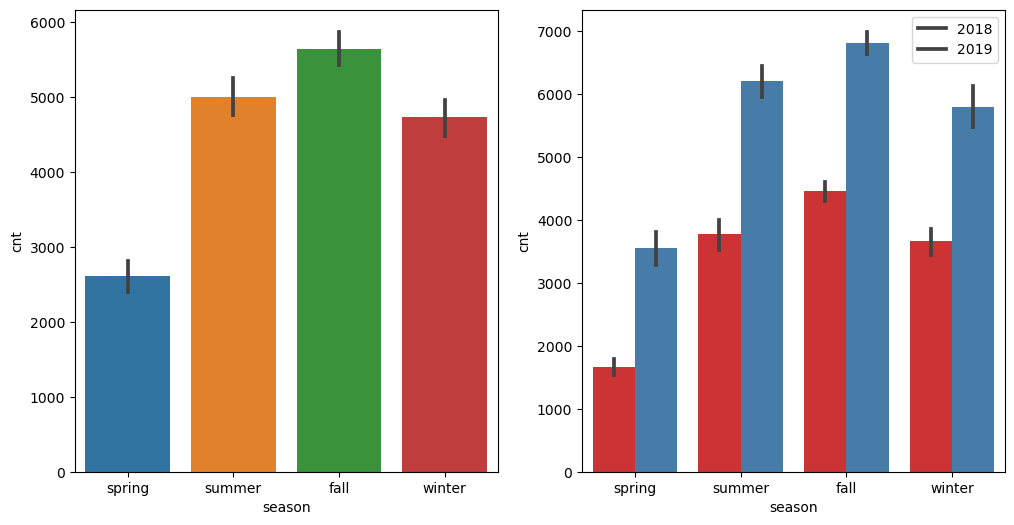

In [34]:
# plotting visulization for season column

plot_cat_columns('season')

fall season seems to have attrached more booking and each season the booking count has increase from 2018 to 2019.



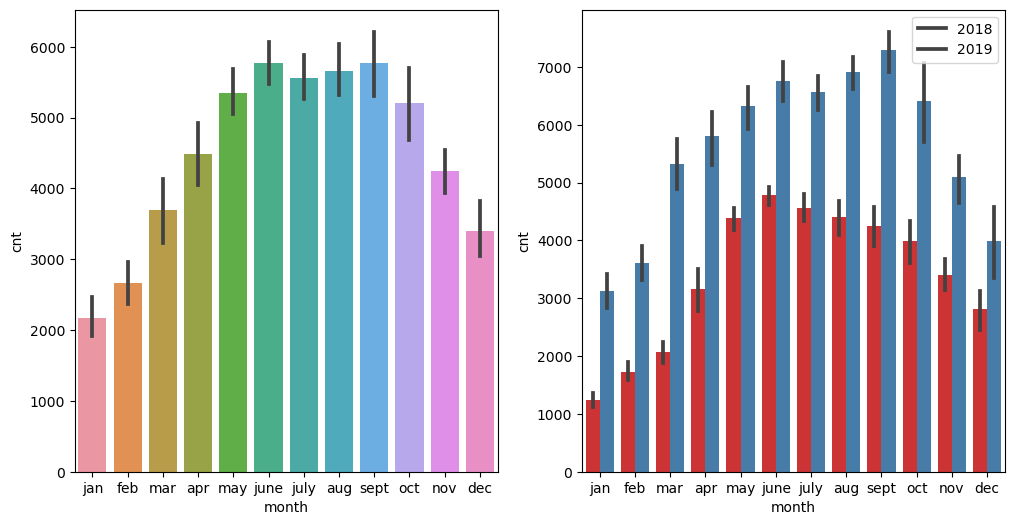

In [35]:
# plotting the month column
plot_cat_columns('month')

most of the bookings has been done during the month of may, june, july, aug, sep and oct. And number of booking for each month seems to have increased from 2018 to 2019.

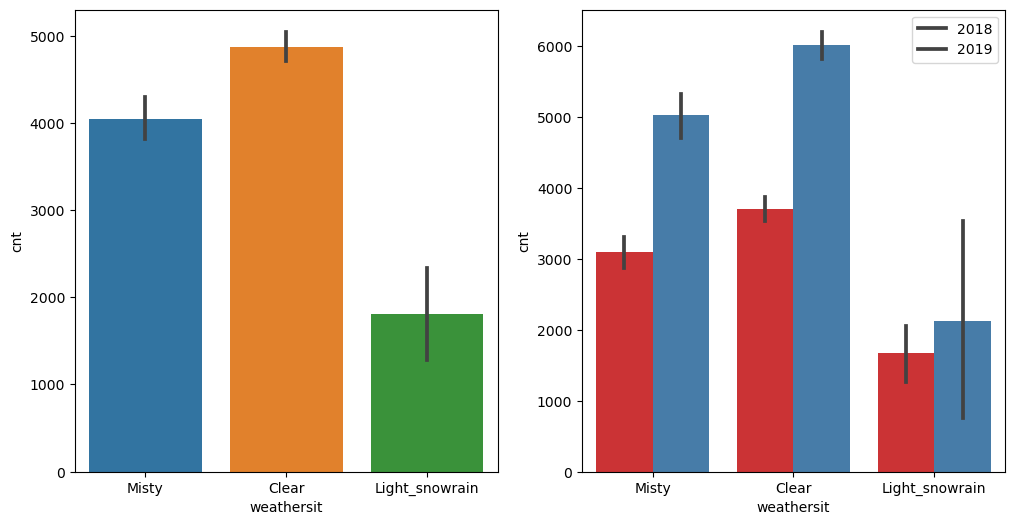

In [36]:
# plotting for weathersit columns
plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year,2018, booking increased for each weather situation in 2019.

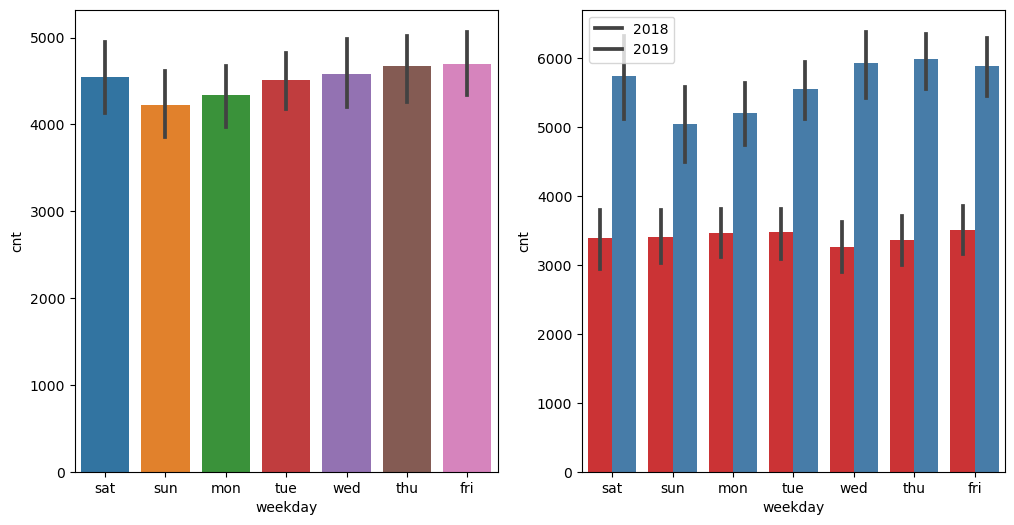

In [37]:
#plotting for weeday column
plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

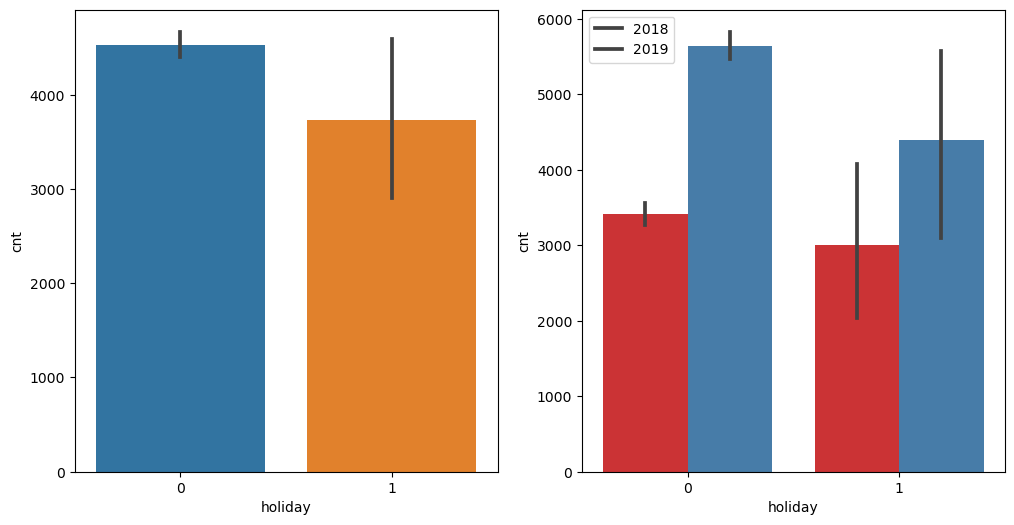

In [38]:
# plotting for holiday column
plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

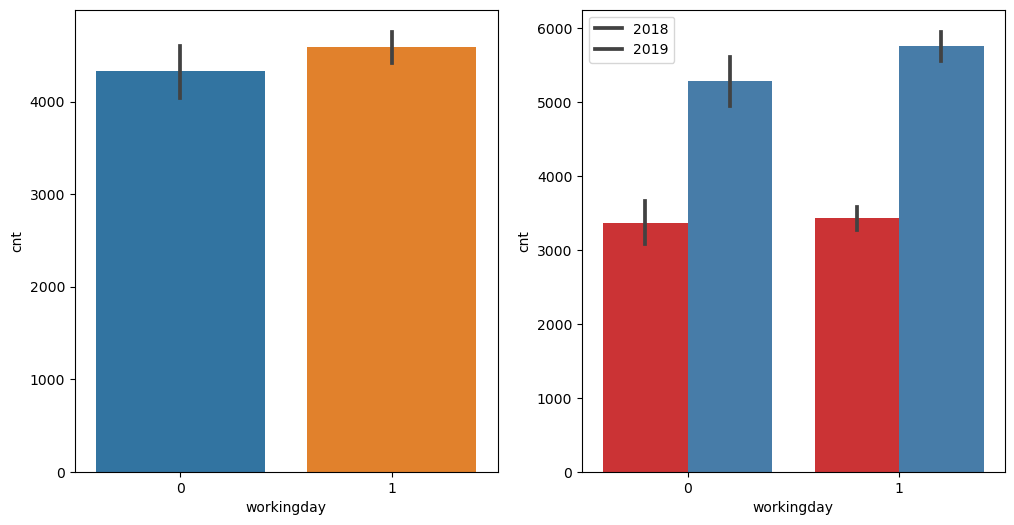

In [39]:
# plotting for workingday
plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

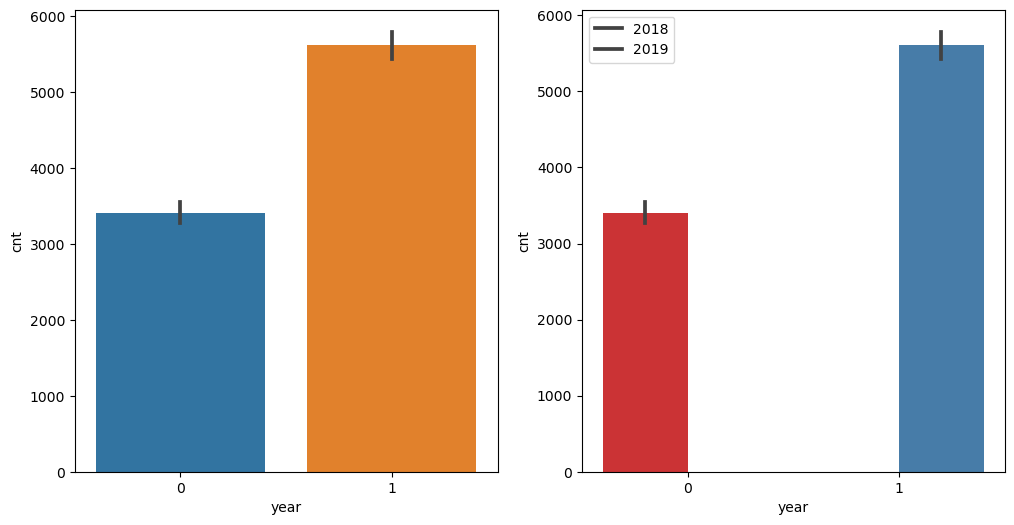

In [40]:
# plotting for year column
plot_cat_columns('year')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

# Numerical columns analysis

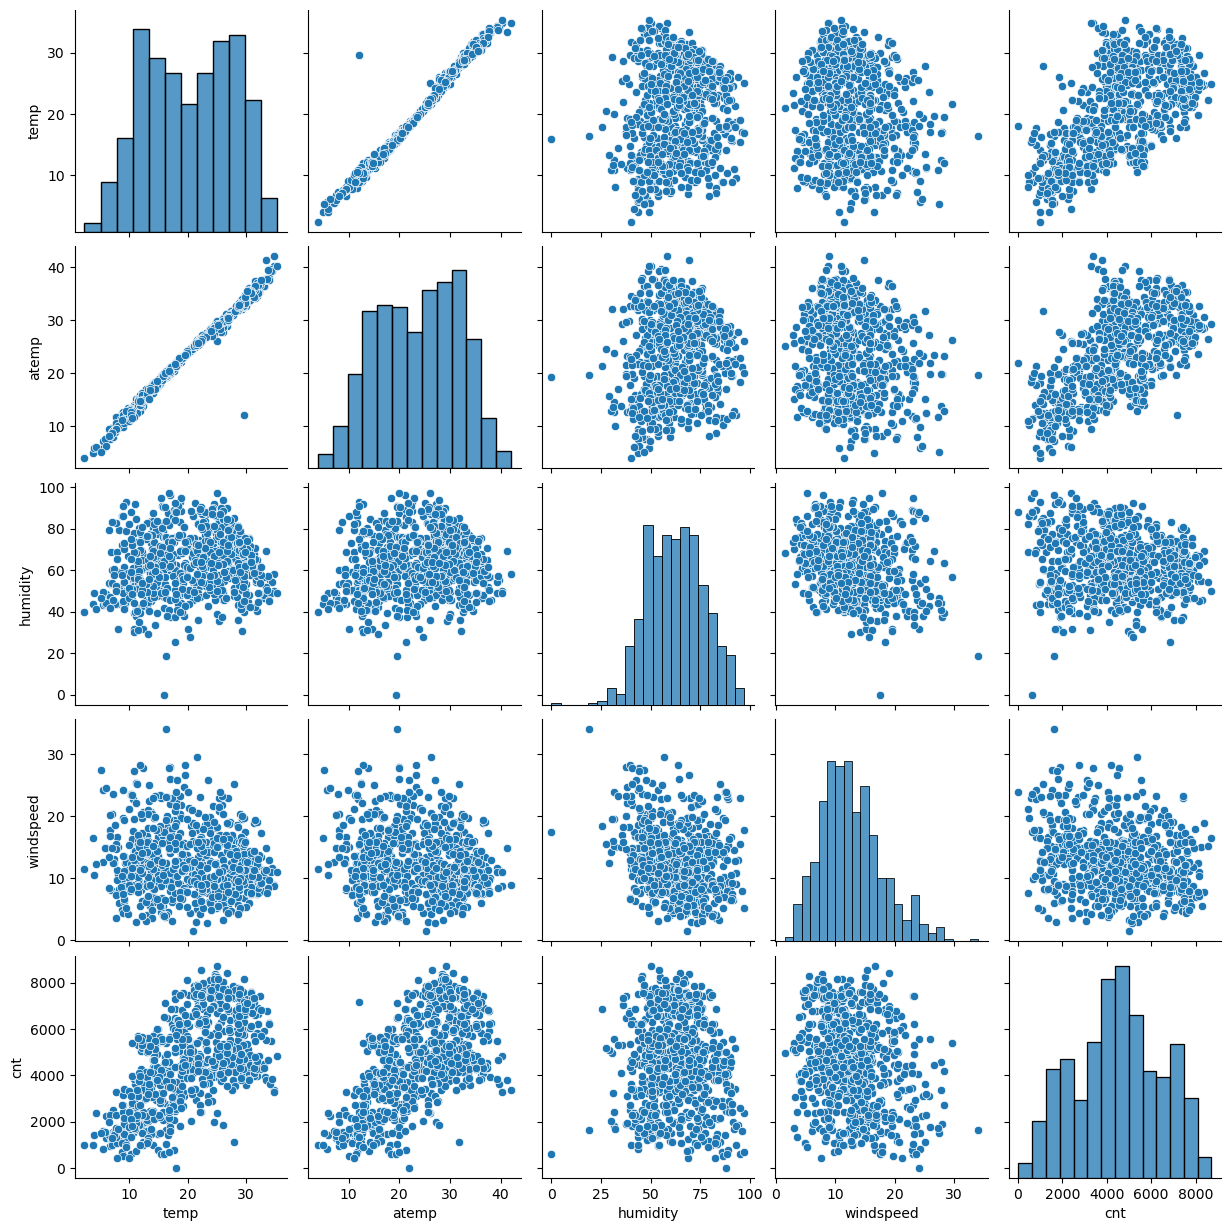

In [41]:
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

Text(0.5, 1.0, 'correlation between Numerical Variables')

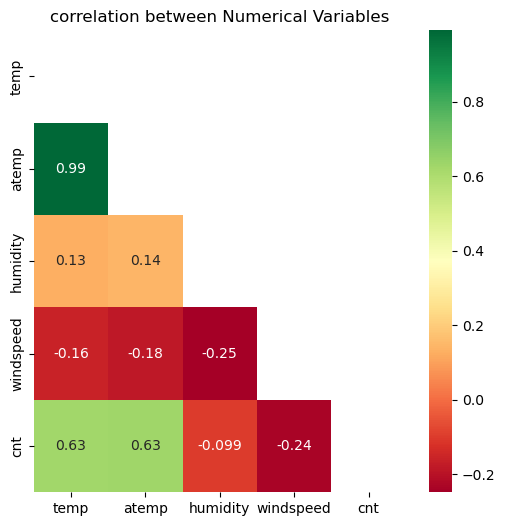

In [42]:
# ckecking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(),annot= True,cmap="RdYlGn", mask=matrix)
plt.title('correlation between Numerical Variables')


There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value other variables.

In [43]:
df.drop(columns=['temp'], axis=1, inplace=True)

In [44]:
df.columns.to_list()

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'atemp',
 'humidity',
 'windspeed',
 'cnt']

# Step 3 Data preparation 

In [45]:
# dummy variable creation for month, weekday, weathersit and season variable.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
season_df=pd.get_dummies(df.season,drop_first=True)

In [46]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


In [47]:
# merging the dataframe,with the dummy variable dataset.

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,season_df],axis=1)
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   atemp           730 non-null    float64
 8   humidity        730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [49]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis =1, inplace = True)

In [50]:
# check the head of new dataframe
df_new.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [51]:
df_new.shape

(730, 29)

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   atemp           730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sept            730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [53]:
# splitting the dataframe into Train and Test( hyperparameter)

np.random.seed(0)
df_train,df_test = train_test_split(df_new,train_size =0.7, test_size=0.3,random_state =100)

In [54]:
print(df_train.columns.to_list())

['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter']


In [55]:
print(df.shape[0])

730


In [56]:
print(len(df_train.columns.to_list()))
print(len(df_test.columns.to_list()))

29
29


In [57]:
# ckeck the shape of training dataset
df_train.shape

(510, 29)

In [58]:
# check the shape of testing dataset.

df_test.shape

(219, 29)

In [59]:
# using minMaxScaler to Rescaling the features.

Scaler = MinMaxScaler()

In [60]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
# apply scaler () to all the columns except the 'yes-no' and 'dummy' variable

num_vars = ['atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [63]:
df_train.head()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [64]:
df_train.describe()

,year,holiday,workingday,atemp,humidity,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


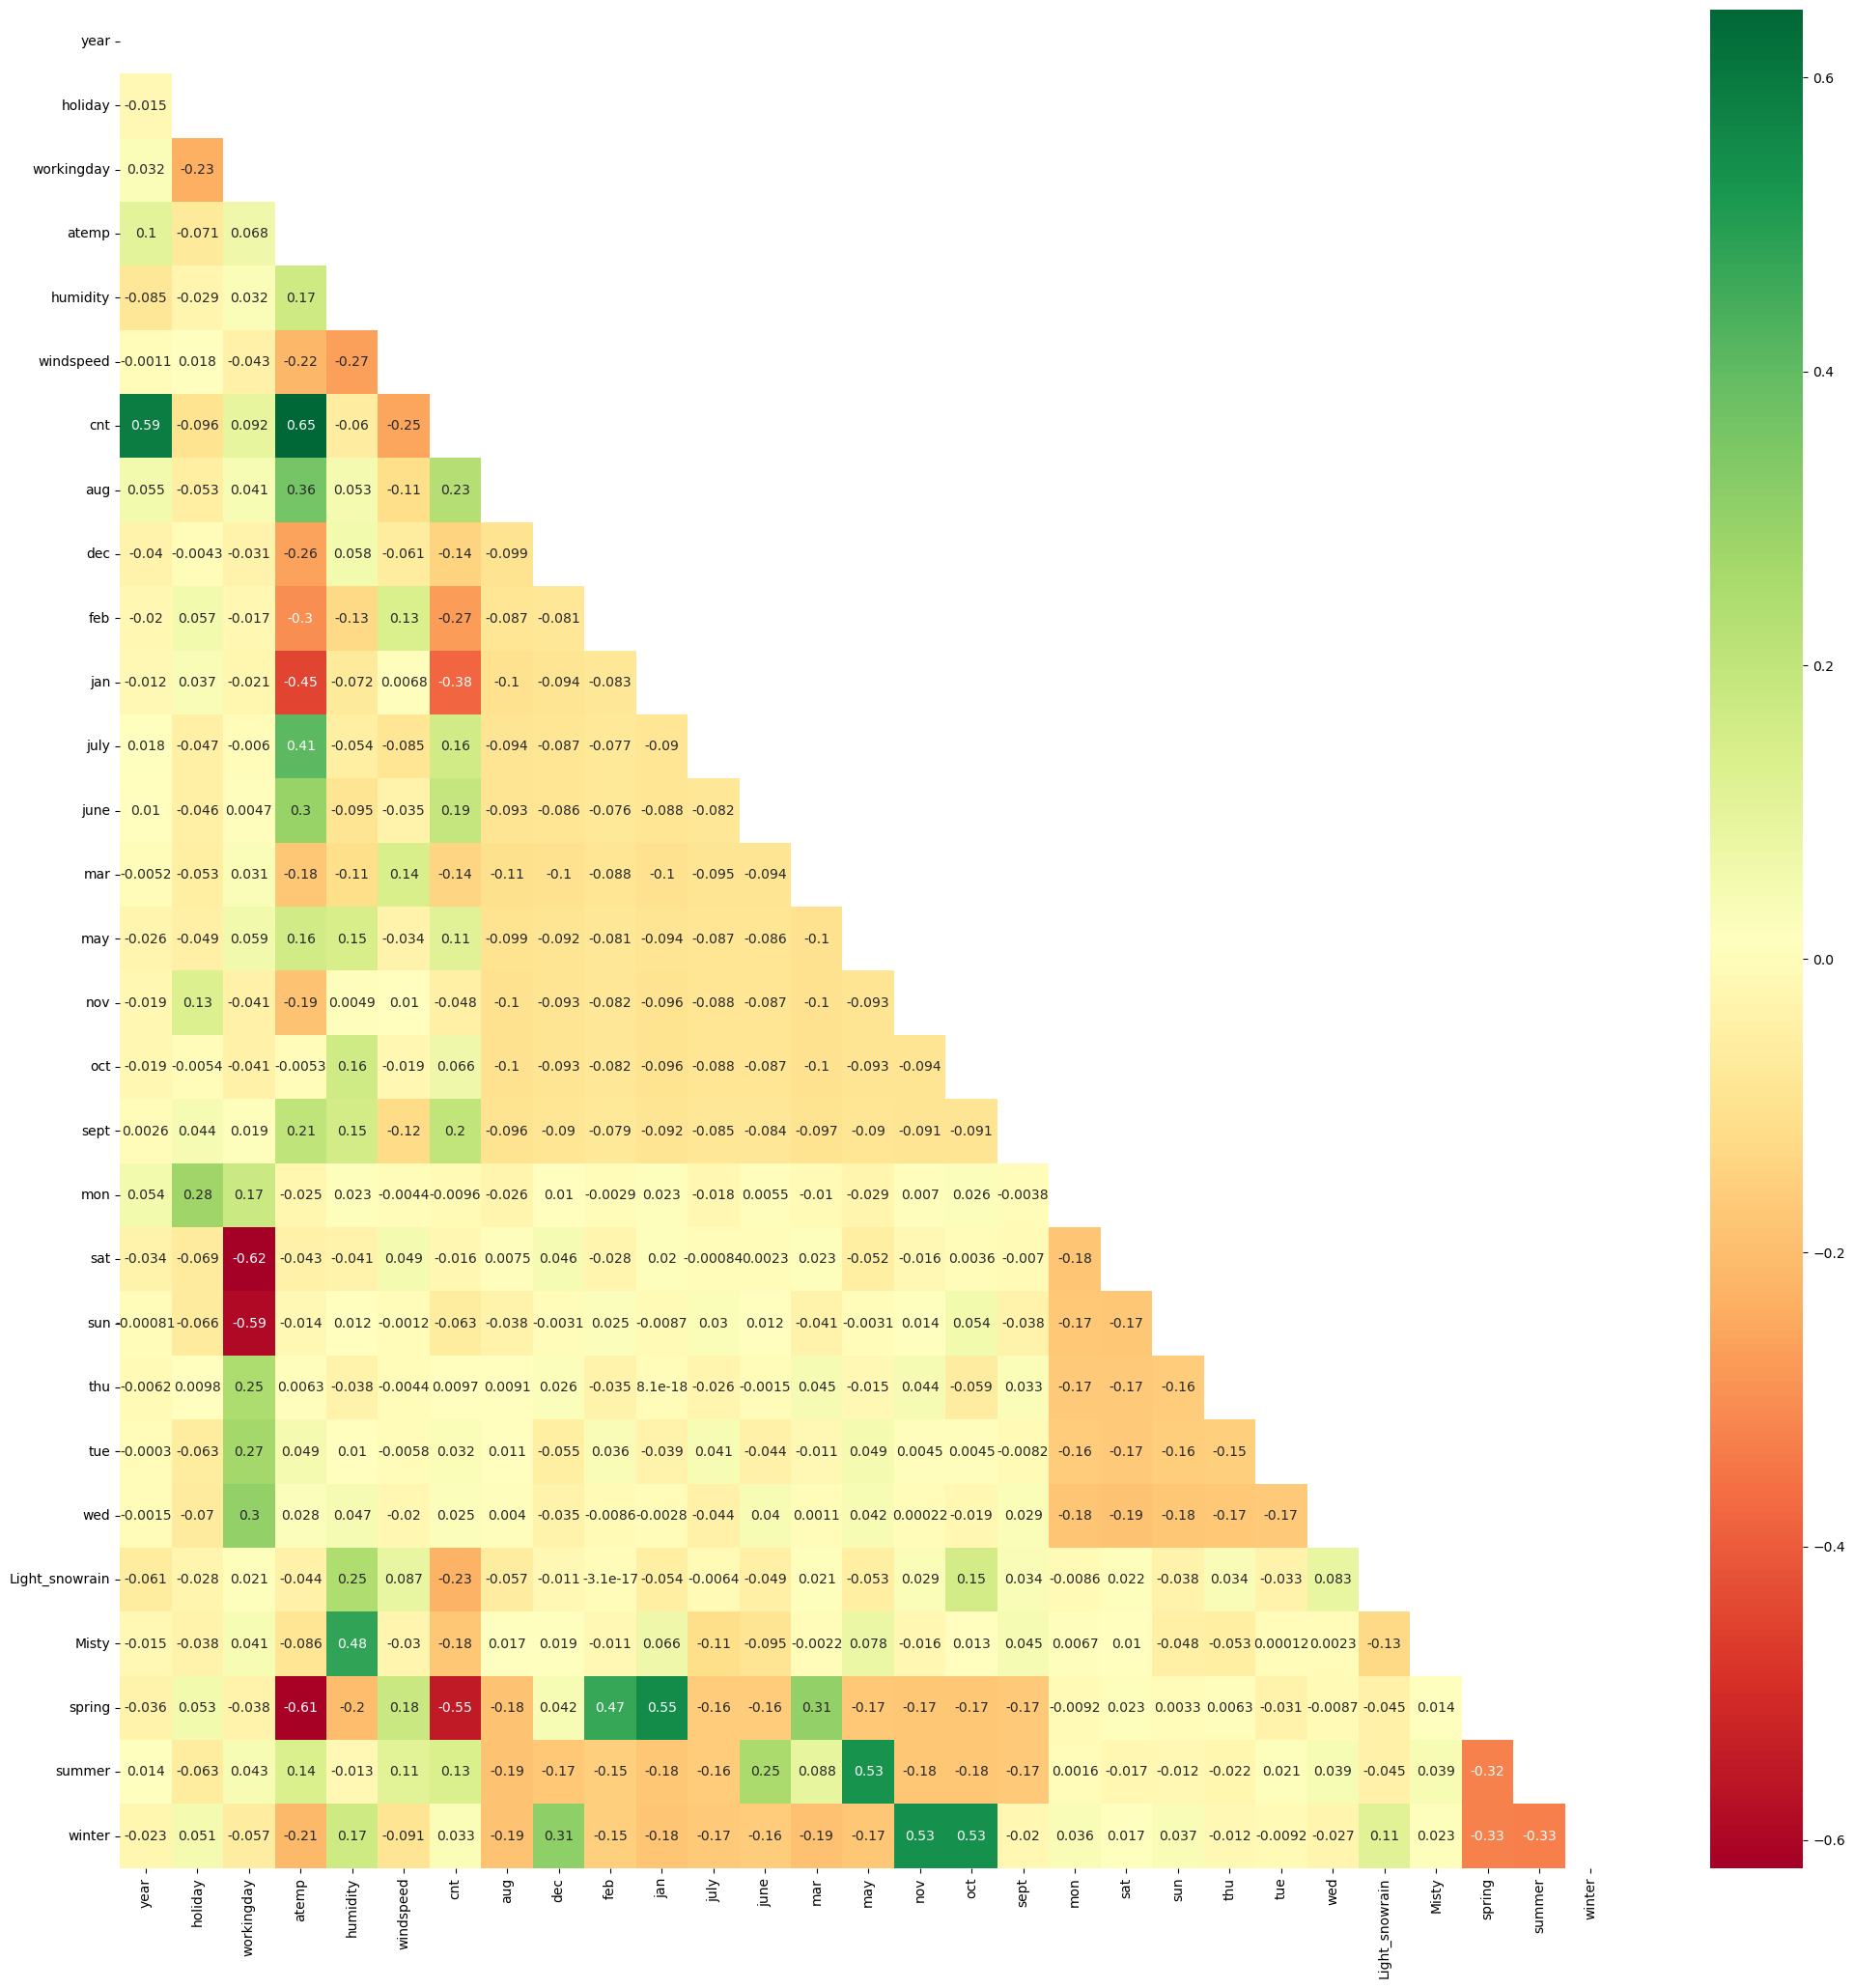

In [65]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

Cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

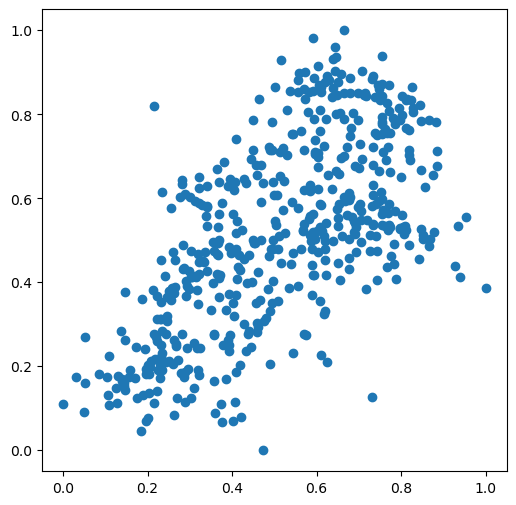

In [66]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp,df_train.cnt)

Visualization confirms the positive correlation between temp and cnt.

In [67]:
y_train = df_train.pop('cnt')
X_train = df_train

In [68]:
X_train_obj = X_train.copy()
X_train_obj.columns = [str(j) for j in X_train.columns]

# Step 5 Feature selection RFE

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe_obj = RFE(estimator=lm, n_features_to_select=15)
rfe_obj.fit(X_train_obj, y_train)
feature_main = rfe_obj.support_
s_features = X_train_obj.columns[feature_main]


In [70]:
print(X_train_obj.columns)

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [71]:
print(X_train_obj[s_features].columns)

Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sept', 'sat', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [72]:
X_train_r = X_train_obj[s_features]

In [73]:
X_train_r.head()

,year,holiday,atemp,humidity,windspeed,dec,jan,july,nov,sept,sat,Light_snowrain,Misty,spring,winter
653,1,0,0.501133,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1
576,1,0,0.766351,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,0,0,0,0,0,1,0,1,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,1,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,1,0,1,0,0


In [74]:
print(X_train_obj.columns)
print(X_train_r.columns)

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')
Index(['year', 'holiday', 'atemp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sept', 'sat', 'Light_snowrain', 'Misty', 'spring',
       'winter'],
      dtype='object')


In [75]:
import statsmodels.api as sm  

X_train_r1 = sm.add_constant(X_train_r)
lm1 = sm.OLS(y_train,X_train_r1).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          9.67e-187
Time:                        21:56:02   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3662      0.032     11.

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.08
2,atemp,16.88
4,windspeed,4.03
14,winter,2.93
13,spring,2.89
12,Misty,2.26
0,year,2.06
8,nov,1.82
6,jan,1.75
5,dec,1.54


In [77]:
X_train_r=X_train_r.drop(['humidity'],axis=1)
X_train_r.head()

,year,holiday,atemp,windspeed,dec,jan,july,nov,sept,sat,Light_snowrain,Misty,spring,winter
653,1,0,0.501133,0.300794,0,0,0,0,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.438975,0.255342,0,0,0,0,0,1,0,1,1,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,0,1,0
482,1,0,0.391735,0.188475,0,0,0,0,0,1,0,1,0,0


In [78]:
X_train_r2 = sm.add_constant(X_train_r)
lm2 = sm.OLS(y_train,X_train_r2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.10e-184
Time:                        21:57:13   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2902      0.026     11.

In [79]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
13,winter,2.55
12,spring,2.36
0,year,2.06
7,nov,1.80
5,jan,1.65
11,Misty,1.53
4,dec,1.46
6,july,1.35


In [80]:
X_train_r=X_train_r.drop(['sat'],axis=1)
X_train_r.head()

,year,holiday,atemp,windspeed,dec,jan,july,nov,sept,Light_snowrain,Misty,spring,winter
653,1,0,0.501133,0.300794,0,0,0,0,0,0,0,0,1
576,1,0,0.766351,0.264686,0,0,1,0,0,0,0,0,0
426,1,0,0.438975,0.255342,0,0,0,0,0,0,1,1,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,1,0,0


In [81]:
X_train_r3 = sm.add_constant(X_train_r)
lm2 = sm.OLS(y_train,X_train_r2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.10e-184
Time:                        21:58:00   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2902      0.026     11.

In [82]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
12,winter,2.55
11,spring,2.35
0,year,2.06
7,nov,1.80
5,jan,1.65
10,Misty,1.53
4,dec,1.46
6,july,1.35


# Add columns

In [83]:
X_train_r['workingday']=X_train_obj['workingday']
X_train_r.head()

,year,holiday,atemp,windspeed,dec,jan,july,nov,sept,Light_snowrain,Misty,spring,winter,workingday
653,1,0,0.501133,0.300794,0,0,0,0,0,0,0,0,1,1
576,1,0,0.766351,0.264686,0,0,1,0,0,0,0,0,0,1
426,1,0,0.438975,0.255342,0,0,0,0,0,0,1,1,0,0
728,1,0,0.200348,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,1,0,0,0


In [84]:
X_train_r4 = sm.add_constant(X_train_r)
lm4 = sm.OLS(y_train,X_train_r4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.04e-184
Time:                        21:59:32   Log-Likelihood:                 501.27
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     495   BIC:                            -909.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2819      0.026     10.

In [85]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.71
3,windspeed,3.98
13,workingday,3.13
12,winter,2.55
11,spring,2.41
0,year,2.06
7,nov,1.81
5,jan,1.66
10,Misty,1.54
4,dec,1.46


In [86]:
X_train_r=X_train_r.drop(['atemp'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,july,nov,sept,Light_snowrain,Misty,spring,winter,workingday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,1
576,1,0,0.264686,0,0,1,0,0,0,0,0,0,1
426,1,0,0.255342,0,0,0,0,0,0,1,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,0,0,0,0,1,0,0,0


In [87]:
X_train_r['aug']=X_train_obj['aug']
X_train_r.head()

,year,holiday,windspeed,dec,jan,july,nov,sept,Light_snowrain,Misty,spring,winter,workingday,aug
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,1,0
576,1,0,0.264686,0,0,1,0,0,0,0,0,0,1,0
426,1,0,0.255342,0,0,0,0,0,0,1,1,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,0,0,0,0,1,0,0,0,0


In [88]:
X_train_r5 = sm.add_constant(X_train_r)
lm5 = sm.OLS(y_train,X_train_r5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          6.73e-160
Time:                        22:00:59   Log-Likelihood:                 442.09
No. Observations:                 510   AIC:                            -854.2
Df Residuals:                     495   BIC:                            -790.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5352      0.016     33.

In [89]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.11
11,winter,2.60
12,workingday,2.59
10,spring,2.40
0,year,1.89
6,nov,1.79
4,jan,1.64
9,Misty,1.51
3,dec,1.45
13,aug,1.21


In [90]:
X_train_r['feb']=X_train_obj['feb']
X_train_r.head()

,year,holiday,windspeed,dec,jan,july,nov,sept,Light_snowrain,Misty,spring,winter,workingday,aug,feb
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,1,0,0
576,1,0,0.264686,0,0,1,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,0,0,0,0,0,0,1,1,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,0,1,0,0,0,0,0


In [92]:
X_train_r7 = sm.add_constant(X_train_r)
lm7 = sm.OLS(y_train,X_train_r7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     133.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.16e-162
Time:                        22:03:44   Log-Likelihood:                 451.28
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     494   BIC:                            -802.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5356      0.016     33.

In [93]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,spring,3.83
2,windspeed,3.11
11,winter,2.64
12,workingday,2.59
4,jan,2.17
0,year,1.89
14,feb,1.86
6,nov,1.80
3,dec,1.54
9,Misty,1.52


In [94]:
X_train_r=X_train_r.drop(['july'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,spring,winter,workingday,aug,feb
653,1,0,0.300794,0,0,0,0,0,0,0,1,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,0,0,0,0,0,1,1,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [95]:
X_train_r['june']=X_train_obj['june']

In [96]:
X_train_r8 = sm.add_constant(X_train_r)
lm8 = sm.OLS(y_train,X_train_r8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          8.02e-165
Time:                        22:05:18   Log-Likelihood:                 456.44
No. Observations:                 510   AIC:                            -880.9
Df Residuals:                     494   BIC:                            -813.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5277      0.015     34.

In [97]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spring,3.85
2,windspeed,3.15
10,winter,2.64
11,workingday,2.59
4,jan,2.17
0,year,1.88
13,feb,1.86
5,nov,1.80
3,dec,1.54
8,Misty,1.51


In [98]:
X_train_r=X_train_r.drop(['workingday'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,spring,winter,aug,feb,june
653,1,0,0.300794,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,1,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [99]:
X_train_r['mar']=X_train_obj['mar']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,spring,winter,aug,feb,june,mar
653,1,0,0.300794,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,1,0,0,0,0,1
728,1,0,0.663106,1,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [100]:
X_train_r8 = sm.add_constant(X_train_r)
lm8 = sm.OLS(y_train,X_train_r8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          3.03e-166
Time:                        22:06:41   Log-Likelihood:                 459.85
No. Observations:                 510   AIC:                            -887.7
Df Residuals:                     494   BIC:                            -819.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5503      0.014     39.

In [101]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spring,6.62
4,jan,3.44
2,windspeed,2.86
12,feb,2.85
10,winter,2.62
14,mar,2.23
5,nov,1.83
0,year,1.82
3,dec,1.74
8,Misty,1.49


In [102]:
X_train_r=X_train_r.drop(['spring'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,winter,aug,feb,june,mar
653,1,0,0.300794,0,0,0,0,0,0,1,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,0,1
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [103]:
X_train_r['may']=X_train_obj['may']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,winter,aug,feb,june,mar,may
653,1,0,0.300794,0,0,0,0,0,0,1,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [104]:
X_train_r9 = sm.add_constant(X_train_r)
lm9 = sm.OLS(y_train,X_train_r9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          8.63e-164
Time:                        22:10:49   Log-Likelihood:                 453.98
No. Observations:                 510   AIC:                            -876.0
Df Residuals:                     494   BIC:                            -808.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5289      0.015     34.

In [105]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.04
9,winter,2.48
0,year,1.85
5,nov,1.79
8,Misty,1.55
3,dec,1.40
13,mar,1.35
4,jan,1.26
11,feb,1.25
14,may,1.23


In [106]:
X_train_r['oct']=X_train_obj['oct']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,winter,aug,feb,june,mar,may,oct
653,1,0,0.300794,0,0,0,0,0,0,1,0,0,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
X_train_r10 = sm.add_constant(X_train_r)
lm10 = sm.OLS(y_train,X_train_r10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     129.2
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.22e-164
Time:                        22:12:25   Log-Likelihood:                 458.59
No. Observations:                 510   AIC:                            -883.2
Df Residuals:                     493   BIC:                            -811.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5403      0.016     34.

In [108]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,winter,8.03
5,nov,4.17
15,oct,4.12
2,windspeed,3.22
3,dec,2.57
0,year,1.85
8,Misty,1.56
13,mar,1.38
6,sept,1.34
4,jan,1.28


In [109]:
X_train_r=X_train_r.drop(['winter'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may,oct
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [110]:
X_train_r['oct']=X_train_obj['oct']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may,oct
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [111]:
X_train_r11 = sm.add_constant(X_train_r)
lm11 = sm.OLS(y_train,X_train_r11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.63e-160
Time:                        22:16:12   Log-Likelihood:                 446.13
No. Observations:                 510   AIC:                            -860.3
Df Residuals:                     494   BIC:                            -792.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5438      0.016     33.

In [112]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.19
0,year,1.84
8,Misty,1.56
12,mar,1.38
4,jan,1.28
5,nov,1.27
10,feb,1.27
14,oct,1.27
9,aug,1.24
13,may,1.24


In [113]:
X_train_r=X_train_r.drop(['oct'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [114]:
X_train_r['mon']=X_train_obj['mon']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may,mon
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [115]:
X_train_r12 = sm.add_constant(X_train_r)
lm12 = sm.OLS(y_train,X_train_r12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          4.53e-160
Time:                        22:19:19   Log-Likelihood:                 445.07
No. Observations:                 510   AIC:                            -858.1
Df Residuals:                     494   BIC:                            -790.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5561      0.015     38.

In [116]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.95
0,year,1.83
8,Misty,1.51
12,mar,1.31
14,mon,1.27
4,jan,1.23
5,nov,1.22
10,feb,1.22
9,aug,1.20
13,may,1.20


In [117]:
X_train_r=X_train_r.drop(['mon'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [118]:
X_train_r['sun']=X_train_obj['sun']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [119]:
X_train_r13 = sm.add_constant(X_train_r)
lm13 = sm.OLS(y_train,X_train_r13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.67e-163
Time:                        22:21:01   Log-Likelihood:                 453.29
No. Observations:                 510   AIC:                            -874.6
Df Residuals:                     494   BIC:                            -806.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5658      0.014     39.

In [120]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.99
0,year,1.82
8,Misty,1.51
12,mar,1.31
4,jan,1.23
5,nov,1.23
10,feb,1.22
9,aug,1.20
13,may,1.20
3,dec,1.17


In [121]:
X_train_r=X_train_r.drop(['may'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [122]:
X_train_r['thu']=X_train_obj['thu']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun,thu
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [123]:
X_train_r14 = sm.add_constant(X_train_r)
lm14 = sm.OLS(y_train,X_train_r14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          5.19e-163
Time:                        22:23:28   Log-Likelihood:                 452.11
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     494   BIC:                            -804.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5733      0.014     42.

In [124]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.84
0,year,1.80
8,Misty,1.46
12,mar,1.27
5,nov,1.21
4,jan,1.20
10,feb,1.19
14,thu,1.18
9,aug,1.17
13,sun,1.17


In [125]:
X_train_r=X_train_r.drop(['thu'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [126]:
X_train_r['tue']=X_train_obj['tue']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun,tue
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [127]:
X_train_r15 = sm.add_constant(X_train_r)
lm15 = sm.OLS(y_train,X_train_r15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          4.58e-163
Time:                        22:25:08   Log-Likelihood:                 452.24
No. Observations:                 510   AIC:                            -872.5
Df Residuals:                     494   BIC:                            -804.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5751      0.014     41.

In [128]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.88
0,year,1.81
8,Misty,1.46
12,mar,1.26
5,nov,1.20
4,jan,1.19
10,feb,1.19
9,aug,1.17
13,sun,1.17
14,tue,1.15


In [129]:
X_train_r=X_train_r.drop(['tue'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [130]:
X_train_r['wed']=X_train_obj['wed']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun,wed
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [131]:
X_train_r16 = sm.add_constant(X_train_r)
lm16 = sm.OLS(y_train,X_train_r16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          4.97e-163
Time:                        22:27:16   Log-Likelihood:                 452.16
No. Observations:                 510   AIC:                            -872.3
Df Residuals:                     494   BIC:                            -804.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5728      0.014     41.

In [132]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.84
0,year,1.81
8,Misty,1.47
12,mar,1.26
14,wed,1.21
4,jan,1.20
5,nov,1.20
10,feb,1.19
9,aug,1.17
13,sun,1.17


In [133]:
X_train_r=X_train_r.drop(['wed'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [134]:
X_train_r['summer']=X_train_obj['summer']
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun,summer
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,1


In [135]:
X_train_r17 = sm.add_constant(X_train_r)
lm17 = sm.OLS(y_train,X_train_r17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          4.59e-163
Time:                        22:28:50   Log-Likelihood:                 452.24
No. Observations:                 510   AIC:                            -872.5
Df Residuals:                     494   BIC:                            -804.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5764      0.015     39.

In [136]:
vif = pd.DataFrame()
X = X_train_r.copy()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in
range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.38
0,year,1.84
14,summer,1.79
8,Misty,1.52
4,jan,1.28
10,feb,1.28
5,nov,1.27
12,mar,1.26
9,aug,1.24
3,dec,1.21


In [137]:
X_train_r=X_train_r.drop(['summer'],axis=1)
X_train_r.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0


In [138]:
#Predict values

y_train_cnt = lm13.predict(X_train_r13[:])

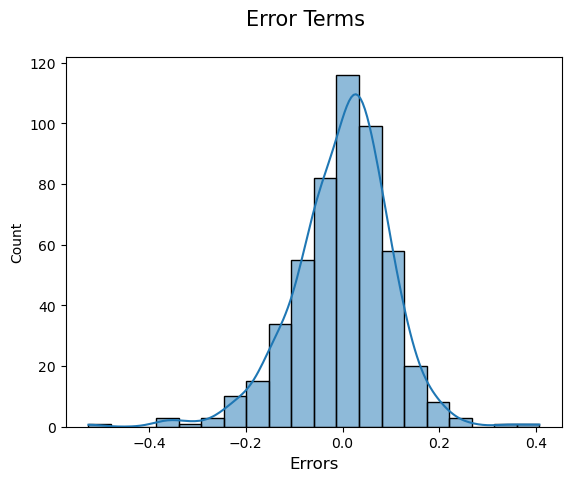

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

#CALCULATING RESIDUALS
residual=y_train - y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot((residual),kde = True, bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('Errors', fontsize = 12)                       
plt.show()

In [140]:
print(X_train_r13.shape)
print(residual.shape)

(510, 16)
(510,)


# Making Predictions Using the Final Model

In [141]:
# Applying scaling on the test dataset

num_vars=['atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [142]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


In [143]:
y_test = df_test['cnt']
X_test = df_test.drop('cnt', axis=1)

X_train_new=X_train_r13.drop(['const'], axis=1)

In [144]:
X_train_new.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [145]:
X_train_new.columns = X_train_new.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

X_test_new = X_test[X_train_new.columns]

In [146]:
X_test_new = sm.add_constant(X_test_new)

In [147]:
y_pred = lm13.predict(X_test_new)

# Model Evaluation

In [148]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Text(0, 0.5, 'y_pred')

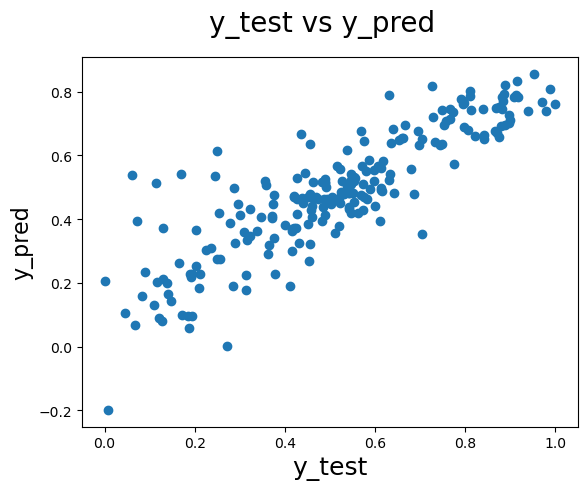

In [149]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [154]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1227389866797557

In [155]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7343917727264434

In [156]:
X_t=X_train_new.iloc[:,0].values

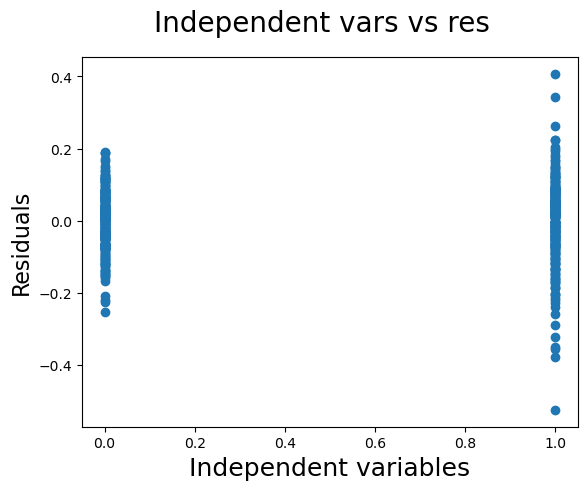

In [159]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,residual)
plt.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [160]:
X_train_new.head()

,year,holiday,windspeed,dec,jan,nov,sept,Light_snowrain,Misty,aug,feb,june,mar,may,sun
653,1,0,0.300794,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0,0,0,0,0,1,0,0,0,1,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,0,0,0,1,0,0,0,0,0,0


In [163]:
print(X_train_r13.columns)
print(lm14.summary())

Index(['const', 'year', 'holiday', 'windspeed', 'dec', 'jan', 'nov', 'sept',
       'Light_snowrain', 'Misty', 'aug', 'feb', 'june', 'mar', 'may', 'sun'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          5.19e-163
Time:                        22:40:33   Log-Likelihood:                 452.11
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     494   BIC:                            -804.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std 

# Interepretation of results

Analysing the above model, the comapany should focus on the following features:

1.Company should focus on expanding business during Spring.
2.Company should focus on expanding business during September.
3.Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4.There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.

# Conclusion

Significant variables to predict the demand for shared bikes

holiday
temp
hum
windspeed
Season
months(January, July, September, November, December)
Year (2019)
Sunday
weathersit( Light Snow, Mist + Cloudy)